<section>
    <div><img src="../../images/Zahra-Amini.jpg"></div>
    <div style="display: flex">
        <div style="width:50%;background:#62060b">
            <div style="margin:auto;width:15rem">
                <img src="../../images/filoger.png" style="width:9rem; padding: 0.5rem 0;display:inline-block; vertical-align: middle">
                <p style="display:inline-block;font-family:monospace;font-weight:bold;font-size:15pt;color:white">
                Filoger
                <p>
            </div>
        </div>
        <div style="width:50%;background:#606368">
            <div style="margin:auto;width:23rem;margin-top: 3rem;">
                <p style="font-family:monospace;font-weight:bold;font-size:15pt;color:#62060b;text-align:center">
                Deep Learning Course
                <p>
                <p style="font-family:monospace;font-weight:bold;font-size:15pt;color:white;text-align:center">
                Episode 4
                <p>
            </div>
        </div>
    </div>
</section>

# Import Lib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import r2_score

from tensorflow.keras.optimizers import SGD

from tensorflow.keras.callbacks import EarlyStopping

### Teacher Description

<section style="text-align:right;direction:rtl;">
    pandas, numpy, matplotlib سه کتاب خوانه پایه یادگیری ماشین هستند.<br/>
    با کمک sklearn.datasets دیتاست مریوط به قیمت خونه ها تو کالیفرنیا آورده شده.<br/>
    train_test_split برای جدا سازی داده های آموزشی و تست آورده شده.<br/>
    StandardScaler کار اسکیل کردن داده هارو برامون قراره انجام بده.<br/>
    tensorflow برای ساخت مدل مون نیازه که ایمپورت کنیم.<br/>
    این کتابخونه هارو هر بار ایمپورت میکنیم
</section>

### Chat-GPT Description

<section style="text-align:right;direction:rtl;">
    در این بخش، کتابخانه‌های مختلفی ایمپورت شده‌اند:<br/>
    <b>'pandas':</b> برای کار با داده‌ها و ساخت DataFrame استفاده می‌شود.<br/>
    <b>'numpy':</b> برای محاسبات عددی و کار با آرایه‌ها.<br/>
    <b>'matplotlib.pyplot':</b> برای ایجاد نمودارها.<br/>
    <b>'fetch_california_housing':</b> برای بارگذاری دیتاست کالیفرنیا هوزینگ.<br/>
    <b>'train_test_split':</b> برای تقسیم داده‌ها به دو مجموعه آموزشی و تست.<br/>
    <b>'StandardScaler':</b> برای استانداردسازی ویژگی‌های داده.<br/>
    <b>'tensorflow و keras':</b> برای ساخت و آموزش مدل‌های یادگیری عمیق.<br/>
    <b>'r2_score':</b> برای ارزیابی دقت مدل با استفاده از معیار R².<br/>
    بهینه‌ساز SGD (Gradient Descent Stochastic) و کلاس EarlyStopping برای کنترل آموزش مدل وارد شده‌اند.
</section>

# Load the dataset

In [9]:
data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Teacher Description

<section style="text-align:right;direction:rtl;">
    <b>fetch_california_housing():</b> با کمک این تابع، داده های ما فراخوانی میشن و اونو داخل یه متغییر قرار دادیم.<br/>
    <b>pd.DataFrame(data.data, columns=data.feature_names):</b> میخوایم دیتا هامون رو بصورت دیتا فریم پانداز در بیاریم که x مون مقادیر و y اسم ستون هاست.<br/>
    <b>df['target'] = data.target:</b> یک ستون دیگه اضافه میکنیم به اسم تارگت و target داخل دیتا رو توش قرار میدیم.<br/>
</section>

# Split the data into training and test sets

In [13]:
# x,y ---> x_train, x_test, y_train, y_test

x = df.drop('target', axis=1)

y = df['target']

### Teacher Description

<section style="text-align:right;direction:rtl;">
    <b>x = df.drop('target', axis = 1):</b> برای اینکه به ستون های x برسیم، ستون target و مقادیرش حذف میکنیم و بقیه رو نگه میداریم. axis روی 1 تنظیم شده تا target مون تو ستون ها جست و جو بشه برای حذف اون ستون.
</section>

In [16]:
x.shape

(20640, 8)

In [17]:
y.shape

(20640,)

### Teacher Description

<section style="text-align:right;direction:rtl;">
    چون یدونه ستون بیشتر نداریم فقط کاما گذاشته شده
</section>

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

### Teacher Description

|<section style="text-align:right;direction:rtl;">
    حواسمون باشه که x_train, x_test, y_train, y_test ها باید به ترتیب باشند.<br/>
    <b>train_test_split(x,y):</b> میاد x رو به 2 قسمت و y رو به 2 قسمت تبدیل میکنه و دو به دو به ترتیبی که بالا بهش اشاره شد جاگذاری میکنه.<br/>
    <b>test_size=0.2:</b> تو جزوه هم اشاره شده که 20 درصد داده ها رو به عنوان تست و 80 درصد اون رو به عنوان داده آموزشی استفاده میکنیم.<br/>
    <b>random_state=42:</b> کاری که میکنه این است که شما زمانی که کد رو بار های مختلف اجرا کنیم، دیگه نتایج تغییر نمیکنه
    د،ر اصل ما باید بصورت رندوم داده های آموزشی و تست رو برداریم، برای اینکه عدد های تصادفی که با اونها داده ها برداشته میشن بصورت ثابت باشن generation seed برای دنباله تصادفی که ساخته میشه تعریف میکنیم. میتونه هر عددی باشد. هر دفعه که این سلول کد رو اجرا کنیم داده های آموزشی و تست یکسان میشه و اگر ست نکنیم هر بار نتایج فرق خواهد کرد.
</section>

In [23]:
x_train.shape

(16512, 8)

In [24]:
x_test.shape

(4128, 8)

# Scale the features

In [26]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

### Teacher Description

<section style="text-align:right;direction:rtl;">
    Scaling رو فقط روی x ها اعمال خواهیم کرد و اصلا روی y ها نباید اینکار صورت بگیره.<br/>
    <b>scaler = StandardScaler():</b> برای اینکار ابتدا باید یک scaler بسازیم.<br/>
     میخوایم scaler فیت بشه و هم منتقل بشه روی داده های x_train.<br/>
    روی داده های تست کافیه فقط منتقل بشه.<br/><br/>
    معمولا standard scaler روی داده های regression مثل همین دیتاست house price بهتر عمل میکنه ولی انتخاب کردن بین normalization و scaler قلق داره و کسایی که دیتا ساینس بلدهستن و آمار مربوط بهش بلدن خیلی خوب متوجه میشن. اگه فعلا علمش رو نداریم میتونیم با آزمون و خطا به این مسعله پی ببریم.<br/>
    اولین کار برای تشخیص مسعله بالا این است که پارامتر هایی مثل  Deviation و Mean که روی distribusion (توزیع) داده ها تاثیر دارن رو محاسبه میکنیم و نسبت به distribusionکه داریم تصمیم میگیریم که داده هارو بین -z تا z محدود کنیم یا از 0 تا z.<br/>
    transform کار اسکیل کردن رو انجام میدهد.
</section>

### Chat-GPT Description

<section style="text-align:right;direction:rtl;">
    Deviation (انحراف معیار) و Mean (میانگین) مستقیماً بر روی توزیع (distribution) داده‌ها تاثیر می‌گذارند. در ادامه، نحوه تأثیر هر یک از این مفاهیم بر توزیع داده‌ها را توضیح می‌دهم:<br/>
    <h4>1. Mean (میانگین)</h4>
    میانگین نشان‌دهنده مقدار مرکزی یا متوسط یک مجموعه داده است. در توزیع نرمال (Normal Distribution)، میانگین همان نقطه مرکزی توزیع است.<br/>
    <b>تاثیر بر توزیع:</b>اگر میانگین داده‌ها تغییر کند، مکان توزیع به چپ یا راست انتقال می‌یابد، اما شکل کلی توزیع (مثلاً پهنای آن) تغییر نمی‌کند. به عبارتی، تغییر میانگین باعث تغییر مکان توزیع روی محور افقی می‌شود، اما تاثیری بر روی پراکندگی داده‌ها ندارد.
    <h4>2. Standard Deviation (انحراف معیار)</h4>
    انحراف معیار نشان‌دهنده میزان پراکندگی داده‌ها نسبت به میانگین است. انحراف معیار بزرگتر به معنای پراکندگی بیشتر داده‌ها و انحراف معیار کوچکتر به معنای تمرکز بیشتر داده‌ها حول میانگین است.<br/>
    <b>تاثیر بر توزیع:</b>اگر انحراف معیار تغییر کند، شکل توزیع تغییر می‌کند. انحراف معیار بالاتر باعث پهن‌تر شدن توزیع و انحراف معیار پایین‌تر باعث تنگ‌تر شدن توزیع می‌شود. در توزیع نرمال، افزایش انحراف معیار باعث پهن‌تر شدن و کاهش آن باعث باریک‌تر شدن قله توزیع می‌شود.
    <h4>در کل:</h4>
    <b>Mean</b> مکان توزیع را تعیین می‌کند، یعنی داده‌ها به سمت چه مقداری گرایش دارند.<br/>
    <b>Standard Deviation</b> میزان پراکندگی داده‌ها حول این مقدار مرکزی را تعیین می‌کند، یعنی چقدر داده‌ها از میانگین فاصله می‌گیرند.<br/>
    این دو عامل با هم شکل و مکان توزیع داده‌ها را تعریف می‌کنند و در یادگیری ماشین، مخصوصاً در فرآیند نرمال‌سازی، برای بهینه‌سازی مدل‌ها به کار می‌روند.
</section>

<section style="text-align:right;direction:rtl;">
    <h4>چرا استانداردسازی داده‌ها مهم است؟</h4>
    در یادگیری ماشین و به خصوص در الگوریتم‌های یادگیری عمیق، ویژگی‌های ورودی (یا داده‌ها) نقش مهمی دارند. داده‌ها معمولاً مقادیر و واحدهای مختلفی دارند؛ برای مثال، در یک دیتاست ممکن است یک ویژگی مقادیر کوچکی مانند 0.1 یا 0.2 داشته باشد، در حالی که ویژگی دیگری مقادیر بزرگتری مثل 1000 یا 2000 داشته باشد.<br/>
    این اختلاف در مقیاس و دامنه مقادیر می‌تواند مشکلاتی ایجاد کند:<br/>
    <b>سختی در یادگیری مدل:</b> مدل‌های یادگیری ماشین ممکن است نسبت به این تفاوت‌ها حساس باشند و در نتیجه یادگیری را به درستی انجام ندهند. این موضوع به ویژه در الگوریتم‌هایی که بر اساس فاصله‌ها یا گرادیان‌ها کار می‌کنند (مثل رگرسیون خطی یا شبکه‌های عصبی) اهمیت دارد.<br/>
    <b>پایین آمدن دقت مدل:</b> مدل ممکن است به ویژگی‌هایی با مقیاس بزرگتر توجه بیشتری کند و ویژگی‌های با مقیاس کوچکتر را نادیده بگیرد. این باعث کاهش دقت پیش‌بینی‌ها می‌شود.
    <h4>استانداردسازی داده‌ها چیست؟</h4>
    استانداردسازی یا Normalization و Standardization دو روش رایج برای تغییر مقیاس داده‌ها هستند. در اینجا ما بیشتر بر روی استانداردسازی تمرکز می‌کنیم.<br/>
    استانداردسازی (Standardization): در این روش، داده‌ها به طوری تغییر می‌کنند که میانگین مقادیر هر ویژگی صفر و انحراف معیار آن برابر با یک باشد. فرمول استانداردسازی به صورت زیر است:<br/>
    𝑍 = 𝑋 - 𝜇 / 𝜎<br/>
    <b>X:</b> مقدار اصلی ویژگی.
    <b>μ:</b> میانگین آن ویژگی در مجموعه داده.<br/>
    <b>σ:</b> انحراف معیار آن ویژگی در مجموعه داده.<br/>
    پس از استانداردسازی، داده‌ها به یک مقیاس مشابه می‌رسند و مدل یادگیری بهتر و دقیق‌تری خواهد داشت.<br/>
    <h4>چگونه استانداردسازی در کد پیاده‌سازی می‌شود؟</h4>
    در کد شما، برای استانداردسازی از کلاس StandardScaler از کتابخانه sklearn استفاده شده است:
    <code style="display:block; text-align:left;direction:ltr">
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    </code>
    <b>گام‌های انجام استانداردسازی:</b>
    <b>ایجاد یک شیء از StandardScaler:</b>
    <code style="display:block; text-align:left;direction:ltr">
    scaler = StandardScaler()
    </code>
    این شیء تنظیمات استانداردسازی را برای داده‌ها نگه می‌دارد.
    <b>آموزش و اعمال استانداردسازی روی داده‌های آموزشی:</b>
    <code style="display:block; text-align:left;direction:ltr">
    X_train = scaler.fit_transform(X_train)
    </code>
    در این مرحله:<br/>
    <b>'fit':</b> میانگین و انحراف معیار را از داده‌های آموزشی محاسبه می‌کند.<br/>
    <b>'transform':</b> داده‌ها را با استفاده از مقادیر محاسبه‌شده (میانگین و انحراف معیار) استانداردسازی می‌کند.<br/>
    <b>استانداردسازی داده‌های تست:</b>
    <code style="display:block; text-align:left;direction:ltr">
    X_test = scaler.transform(X_test)
    </code>
    در این مرحله، داده‌های تست با استفاده از مقادیر میانگین و انحراف معیاری که از داده‌های آموزشی محاسبه شده بود، استانداردسازی می‌شوند.
    <h4>چرا این کار انجام می‌شود؟</h4>
    مهم است که استانداردسازی داده‌های تست با همان پارامترهای داده‌های آموزشی انجام شود، زیرا:<br/>
    <b>یکپارچگی:</b> مدل باید داده‌های تست را همانند داده‌های آموزشی ببیند، بنابراین از همان مقادیر میانگین و انحراف معیار استفاده می‌شود.<br/>
    <b>دقت پیش‌بینی:</b> استفاده از مقادیر جدید برای داده‌های تست (یعنی محاسبه‌ی دوباره‌ی میانگین و انحراف معیار) می‌تواند باعث شود که داده‌های تست به درستی ارزیابی نشوند.
    <h4>جمع‌بندی:</h4>
    استانداردسازی داده‌ها، فرآیندی است که باعث می‌شود داده‌ها به یک مقیاس مشترک برسند، که این امر باعث بهبود دقت و کارایی مدل‌های یادگیری ماشین می‌شود. این کار به‌ویژه زمانی مهم است که داده‌های شما دارای مقیاس‌های بسیار متفاوت باشند.
</section>

In [31]:
x_train

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

# Build the neural network model

In [33]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

C:\Users\MA_Malekzadeh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Teacher Description

<section style="text-align:right;direction:rtl;">
    با دستور Sequential() یک مدل میسازیم و کاری که انجام میده اینه که دنباله ای از چیزهارو بهم وصل میکند.<br>
    بعد باید لایه هارو اضافه کنیم. به هرکدوم از لایه ها که شامل input,hidden,output هست رو یک Dense میگیم.
    <h4>لایه اول:</h4>
    تو لایه اول میخوایم 128  تا نورون باشه و اکتیویشن فانکشن رو relu قرار میدیم بخاطر مثبت بودن در رگرسیون.<br/>
    <b>x_train.shape[1]:</b> عدد 8 رو برمیگردونه چون 8 تا feature داشتیم تو دیتاست.<br/>
    <b>input_shape=(x_train.shape[1],):</b> کاما بخاطر این گذاشته شده که وکتور عمودی باشه.<br/>
    چون 8 تا ورودی داریم برای مدل، تو لایه اول شکل ورودی مون رو بصورت عمودی با 8 ورودی در نظر گرفتیم.
    <h4>لایه دوم:</h4>
    لایه بعدی 64 نورون داره و activation function مون رو relu درنظر میگیرم
    <h4>لایه سوم:</h4>
    لایه بعدی 32 نورون داره و activation function مون رو relu درنظر میگیرم
    <h4>لایه آخر:</h4>
    یدونه نورون داریم پس روی 1 تنظیم میکنیم.
</section>

### Chat-GPT Description

<section style="text-align:right;direction:rtl;">
    <h4>Keras چیست؟</h4>
    Keras یک کتابخانه سطح بالا برای ساخت و آموزش مدل‌های یادگیری عمیق است که بر روی کتابخانه‌هایی مانند TensorFlow اجرا می‌شود. این کتابخانه استفاده از شبکه‌های عصبی پیچیده را به‌سادگی و با کدهای مختصر امکان‌پذیر می‌کند.<br/>
    <h4>ساخت مدل با Keras</h4>
    در کد شما، یک مدل شبکه عصبی ساده با استفاده از Keras ساخته شده است. این شبکه برای انجام رگرسیون خطی (پیش‌بینی مقدار پیوسته) استفاده می‌شود.<br/><br/>
    <b>کد مربوطه:</b>
</section>

<code style="display:block; text-align:left;direction:ltr">model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=SGD(), loss='mse', metrics=['mae'])
</code>

<section style="text-align:right;direction:rtl;">
    اجازه دهید این کد را به صورت گام به گام توضیح دهم.
    <h4>1. ساختار مدل (Model Architecture)</h4>
    در Keras، مدل‌ها معمولاً به دو روش ساخته می‌شوند: مدل ترتیبی (Sequential) و مدل تابعی (Functional). در اینجا، از مدل ترتیبی استفاده شده است.<br/><br/>
    <b>1.1 مدل ترتیبی (Sequential Model)<b>
</section>
    
<code style="display:block; text-align:left;direction:ltr">model = Sequential([
    # Layers
])
</code>

<section style="text-align:right;direction:rtl;">
    <b>Sequential:</b> این نوع مدل به شما اجازه می‌دهد لایه‌ها را به ترتیب به مدل اضافه کنید. هر لایه به عنوان ورودی برای لایه بعدی عمل می‌کند.<br>
    <b>1.2 لایه‌های شبکه عصبی (Layers of the Neural Network)</b><br>
    لایه‌ها واحدهای اساسی در شبکه‌های عصبی هستند. هر لایه عملیاتی بر روی داده‌های ورودی انجام می‌دهد و خروجی خود را به لایه بعدی ارسال می‌کند.<br><br>
    <b>1.2.1 لایه Dense (Dense Layer)</b>
</section>

<code style="display:block; text-align:left;direction:ltr">Dense(64, activation='relu', input_shape=(X_train.shape[1],))</code>

<section style="text-align:right;direction:rtl;">
    <b>Dense:</b> این لایه یکی از رایج‌ترین لایه‌ها در شبکه‌های عصبی است. در این لایه، هر نورون (واحد) به تمام نورون‌های لایه قبلی متصل است. به این لایه‌ها گاهی "کاملاً متصل" یا "فولی‌کانکتد" گفته می‌شود.<br/>
    <b>64:</b> تعداد نورون‌های این لایه است. در اینجا 64 نورون وجود دارد.<br/>
    <b>activation='relu':</b> تابع فعال‌سازی برای نورون‌ها. تابع ReLU (Rectified Linear Unit) یکی از محبوب‌ترین توابع فعال‌سازی است که مقادیر منفی را به صفر تبدیل می‌کند و مقادیر مثبت را به همان صورت نگه می‌دارد. این تابع به مدل کمک می‌کند تا الگوهای پیچیده‌تری را یاد بگیرد.<br/>
    <b>input_shape=(X_train.shape[1],):</b> شکل ورودی به این لایه. این بخش فقط در اولین لایه مشخص می‌شود. X_train.shape[1] تعداد ویژگی‌های ورودی است (تعداد ستون‌های دیتاست آموزشی).<br/><br/>
    <b>1.2.2 لایه Dropout</b>
</section>

<code style="display:block; text-align:left;direction:ltr">Dropout(0.5)</code>

<section style="text-align:right;direction:rtl;">
    <b>Dropout:</b> این لایه به منظور جلوگیری از overfitting (یادگیری بیش از حد مدل روی داده‌های آموزشی) استفاده می‌شود. در حین آموزش، این لایه به‌صورت تصادفی برخی از نورون‌ها را غیر فعال می‌کند.<br/>
    <b>0.5:</b> این مقدار نشان می‌دهد که 50% از نورون‌ها به صورت تصادفی در هر مرحله غیرفعال می‌شوند. این کار باعث می‌شود مدل به جای اتکا به چند ویژگی، الگوهای متنوع‌تری را یاد بگیرد.<br/><br/>
    <b>1.2.3 لایه دوم Dense</b>
</section>

<code style="display:block; text-align:left;direction:ltr">Dense(64, activation='relu')</code>

<section style="text-align:right;direction:rtl;">
    این لایه دقیقاً مشابه اولین لایه Dense است و 64 نورون دارد و از تابع فعال‌سازی ReLU استفاده می‌کند. این لایه به مدل کمک می‌کند تا الگوهای پیچیده‌تر را یاد بگیرد.<br/><br/>
    <b>1.2.4 لایه خروجی (Output Layer)</b>
</section>

<code style="display:block; text-align:left;direction:ltr">Dense(1)</code>

<section style="text-align:right;direction:rtl;">
    <b>Dense(1):</b> این لایه تنها یک نورون دارد. چون ما در حال انجام یک مسئله رگرسیون هستیم که هدف آن پیش‌بینی یک مقدار عددی پیوسته (مانند قیمت مسکن) است، تنها یک نورون در لایه خروجی کافی است.<br/>
    این لایه تابع فعال‌سازی ندارد، چرا که هدف ما پیش‌بینی یک مقدار عددی است و نیاز به تغییر شکل خروجی نداریم.<br/>
    <h4>2. کامپایل کردن مدل (Model Compilation)</h4>
    بعد از تعریف ساختار مدل، ما باید آن را کامپایل کنیم. در این مرحله، ما به مدل می‌گوییم که از چه بهینه‌سازی (optimizer)، چه تابع زیانی (loss function) و چه معیارهایی (metrics) استفاده کند.
</section>


<code style="display:block; text-align:left;direction:ltr">model.compile(optimizer=SGD(), loss='mse', metrics=['mae'])</code>

<section style="text-align:right;direction:rtl;">
    <b>2.1 بهینه‌سازی (Optimizer)</b><br/>
    <b>SGD (Stochastic Gradient Descent):</b> این یک الگوریتم بهینه‌سازی است که برای کمینه کردن تابع زیان استفاده می‌شود. SGD به‌صورت تصادفی وزن‌های مدل را به‌روز می‌کند تا تابع زیان به مقدار کمینه خود برسد.<br/>
    <b>2.2 تابع زیان (Loss Function)</b><br/>
    <b>MSE (Mean Squared Error):</b> این تابع زیان برای مسائل رگرسیون مناسب است. این تابع میانگین مربعات تفاوت بین پیش‌بینی مدل و مقادیر واقعی را محاسبه می‌کند. هدف این است که این مقدار را تا حد امکان کمینه کنیم.<br/>
    <b>2.3 معیار ارزیابی (Metrics)</b><br/>
    <b>MAE (Mean Absolute Error):</b> این معیار میانگین قدر مطلق تفاوت‌های بین مقادیر پیش‌بینی‌شده و واقعی را محاسبه می‌کند. این معیار به عنوان یک معیار ارزیابی برای عملکرد مدل استفاده می‌شود.
    <h4>جمع‌بندی:</h4>
    در این بخش، یک مدل شبکه عصبی ساده با استفاده از Keras ساخته شده که شامل لایه‌های Dense و Dropout است. مدل برای حل یک مسئله رگرسیون طراحی شده و با استفاده از بهینه‌سازی SGD و تابع زیان MSE کامپایل شده است. این مدل به شما کمک می‌کند تا بتوانید پیش‌بینی‌های عددی دقیقی انجام دهید.
</section>

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

### Teacher Description

<section style="text-align:right;direction:rtl;">
    منظور از پارامتر در خروجی سلول بالا بایاس و وزن ها می باشد.
</section>

# Compile the model

In [42]:
model.compile(optimizer = SGD(learning_rate= 0.01, momentum=0.5), loss= 'mse', metrics=['mae'])

### Chat-GPT Description

<section style="text-align:right;direction:rtl;">
    <h4>1. مرحله کامپایل کردن مدل (Model Compilation)</h4>
    قبل از اینکه بتوانید یک مدل یادگیری عمیق را آموزش دهید، باید آن را کامپایل کنید. کامپایل کردن مدل به این معنی است که شما باید به مدل بگویید که از چه بهینه‌سازی (optimizer)، تابع زیان (loss function) و معیارهای ارزیابی (metrics) استفاده کند.<br/>
    کد زیر، این مرحله را انجام می‌دهد:<br/>
    <code style="display:block; text-align:left;direction:ltr">
          model.compile(optimizer=SGD(), loss='mse', metrics=['mae'])  
    </code>
    در ادامه، هر یک از این بخش‌ها را توضیح می‌دهم:<br/>
    <h4>2. بهینه‌سازی (Optimizer)</h4>
    <code style="display:block; text-align:left;direction:ltr">
        optimizer=SGD()
    </code>
    <b>SGD (Stochastic Gradient Descent):</b> این یک الگوریتم بهینه‌سازی است که برای کمینه‌کردن تابع زیان استفاده می‌شود. در هر مرحله از آموزش (epoch)، این الگوریتم وزن‌های مدل را با استفاده از گرادیان کاهشی به‌روزرسانی می‌کند.<br/>
    <b>نحوه‌ی کارکرد:</b> در روش گرادیان کاهشی تصادفی، به جای استفاده از کل داده‌های آموزشی برای محاسبه‌ی گرادیان (که در گرادیان کاهشی معمولی اتفاق می‌افتد)، هر بار یک نمونه (یا یک مینی‌بت) از داده‌ها انتخاب می‌شود. این کار باعث می‌شود که به‌روزرسانی وزن‌ها سریع‌تر انجام شود و مدل سریع‌تر به حداقل محلی برای تابع زیان برسد.<br/>
    <b>چرا SGD؟ روش</b> SGD به دلیل سرعت بالا و سادگی در مسائل مختلف استفاده می‌شود. همچنین، در مشکلاتی که داده‌ها بسیار بزرگ هستند، استفاده از کل داده‌ها در هر به‌روزرسانی می‌تواند بسیار زمان‌بر باشد، به همین دلیل SGD گزینه‌ی مناسبی است.
    <h4>3. تابع زیان (Loss Function)</h4>
    <code style="display:block; text-align:left;direction:ltr">
        loss='mse'
    </code>
    <b>MSE (Mean Squared Error):</b> این یک تابع زیان است که برای مسائل رگرسیون (مانند پیش‌بینی مقادیر عددی) استفاده می‌شود.<br/>
    نحوه‌ی کارکرد: این تابع، میانگین مربعات اختلاف بین مقادیر پیش‌بینی‌شده توسط مدل و مقادیر واقعی را محاسبه می‌کند. فرمول آن به شکل زیر است:<br/>
    <img src="https://arize.com/wp-content/uploads/2021/12/MSE.png" width=300 style="display:block; margin:auto" alt="به اینترنت وصل شو رفیق">
    که در آن:<br/>
    <b>y^i:</b> مقدار پیش‌بینی‌شده توسط مدل است.<br/>
    <b>yi:</b> مقدار واقعی است.<br/>
    <b>n:</b> تعداد نمونه‌ها است.<br/>
    <b>هدف:</b> هدف از استفاده از این تابع، کمینه کردن اختلاف بین مقادیر پیش‌بینی‌شده و واقعی است. وقتی مدل به درستی آموزش ببیند، مقدار MSE باید به حداقل برسد.
    <h4>4. معیارهای ارزیابی (Metrics)</h4>
    <code style="display:block; text-align:left;direction:ltr">
        metrics=['mae']
    </code>
    <b>MAE (Mean Absolute Error):</b> این یکی از معیارهای ارزیابی است که برای سنجش دقت مدل استفاده می‌شود.<br/>
    <b>نحوه‌ی کارکرد:</b> MAE میانگین قدر مطلق اختلاف بین مقادیر پیش‌بینی‌شده و مقادیر واقعی را محاسبه می‌کند. فرمول آن به شکل زیر است:<br/><br/><br/>
    <img src="https://miro.medium.com/v2/resize:fit:723/1*9BhnZiaHkApC-gQt3rYpMQ.png" width=500 style="display:block; margin:auto" alt="به اینترنت وصل شو رفیق"><br/><br/><br/>
    که در آن:<br/>
    <b>y^i:</b>مقدار پیش‌بینی‌شده توسط مدل است.<br/>
    <b>yi:</b>مقدار واقعی است.<br/>
    <b>n:</b> تعداد نمونه‌ها است.<br/>
    <b>چرا MAE؟</b> این معیار به شما کمک می‌کند تا بفهمید مدل شما به‌طور میانگین چقدر از مقادیر واقعی فاصله دارد. برخلاف MSE، MAE تأثیر زیادی از خطاهای بزرگ نمی‌پذیرد، زیرا فقط به اختلاف مطلق توجه می‌کند، نه به مربع آن‌ها.<br/>
    <b>چند نکته:</b> در حالی که MSE بیشتر به عنوان تابع زیان استفاده می‌شود، MAE معمولاً به عنوان معیار ارزیابی مدل استفاده می‌شود، زیرا تفسیر آن آسان‌تر است (مستقیماً نشان می‌دهد که به‌طور میانگین چقدر خطا داریم).<br/>
    <h4>خلاصه کلی</h4>
    کد model.compile(optimizer=SGD(), loss='mse', metrics=['mae']) مدل شما را برای آموزش آماده می‌کند. این تنظیمات تعیین می‌کنند که:<br/>
    <b>SGD:</b> الگوریتم بهینه‌سازی مدل است که وزن‌ها را با استفاده از روش گرادیان کاهشی تصادفی به‌روزرسانی می‌کند.<br/>
    <b>MSE:</b> تابع زیانی است که مدل باید در حین آموزش کمینه کند. این تابع میانگین مربعات اختلاف بین پیش‌بینی‌ها و مقادیر واقعی را محاسبه می‌کند.<br/>
    <b>MAE:</b> معیاری است که برای ارزیابی دقت مدل استفاده می‌شود. این معیار میانگین قدر مطلق اختلافات را نشان می‌دهد.<br/>
</section>

# Train the model

In [46]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1630 - mae: 0.7095 - val_loss: 0.5567 - val_mae: 0.4790
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4266 - mae: 0.4651 - val_loss: 0.4759 - val_mae: 0.5089
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4060 - mae: 0.4591 - val_loss: 0.4035 - val_mae: 0.4442
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3670 - mae: 0.4303 - val_loss: 0.3840 - val_mae: 0.4318
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3691 - mae: 0.4294 - val_loss: 0.3766 - val_mae: 0.4324
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3467 - mae: 0.4146 - val_loss: 0.3631 - val_mae: 0.4243
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3346 - mae: 0.4085 - val_loss: 0.3809 - val_mae: 0.4584
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3333 - mae: 0.4078 - val_loss: 0.3489 - val_mae: 0.4049
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

### Chat-GPT Description

<section style="text-align:right;direction:rtl;">
    <h4>1. مقدمه: تابع fit در Keras</h4>
    در Keras، تابع fit اصلی‌ترین تابع برای آموزش مدل است. این تابع مدل شما را با استفاده از داده‌های ورودی (x_train) و خروجی (y_train) آموزش می‌دهد. در طی این فرآیند، مدل سعی می‌کند وزن‌های خود را به‌گونه‌ای تنظیم کند که تابع زیان (loss) کاهش یابد و دقت مدل افزایش یابد.
    <h4>2. پارامترهای اصلی fit</h4>
    اجازه دهید هر یک از پارامترهای استفاده‌شده در این تابع را به‌طور جداگانه توضیح دهم:<br/>
    <b>2.1 x_train و y_train: داده‌های آموزشی</b><br/>
    <code style="display:block; text-align:left;direction:ltr">
        x_train, y_train
    </code>
    <b>x_train:</b> این آرایه شامل داده‌های ورودی است که مدل با آن‌ها آموزش می‌بیند. برای مثال، اگر داده‌های ورودی شما تصاویر باشند، x_train شامل پیکسل‌های این تصاویر خواهد بود.<br/>
    <b>y_train:</b> این آرایه شامل برچسب‌های واقعی یا خروجی‌های مورد نظر است که مدل باید یاد بگیرد. برای مثال، اگر مسئله شما دسته‌بندی تصاویر باشد، y_train شامل کلاس‌های مرتبط با هر تصویر خواهد بود.<br/>
    <b>2.2 validation_split: تقسیم‌بندی داده‌ها برای اعتبارسنجی</b><br/>
    <code style="display:block; text-align:left;direction:ltr">
        validation_split=0.2
    </code>
    <b>validation_split=0.2:</b> این پارامتر مشخص می‌کند که 20٪ از داده‌های آموزشی به عنوان داده‌های اعتبارسنجی (validation data) استفاده شوند. یعنی Keras به‌طور خودکار 80٪ از داده‌ها را برای آموزش و 20٪ را برای اعتبارسنجی جدا می‌کند.<br/>
    <b>چرا داده‌های اعتبارسنجی؟</b> داده‌های اعتبارسنجی به شما کمک می‌کنند که عملکرد مدل را در طول آموزش ارزیابی کنید. اگر مدل در حین آموزش روی داده‌های آموزشی عملکرد خوبی داشته باشد اما روی داده‌های اعتبارسنجی عملکرد ضعیفی داشته باشد، این نشان‌دهنده‌ی overfitting است.<br/><br/>
    <b>2.3 epochs:</b> تعداد دوره‌های آموزشی
    <code style="display:block; text-align:left;direction:ltr">
        epochs=20
    </code>
    <b>epochs=20:</b> تعداد epochها تعیین می‌کند که مدل شما چند بار به‌طور کامل روی کل داده‌های آموزشی آموزش ببیند. یک epoch یعنی مدل یک بار تمامی داده‌های x_train و y_train را پردازش کند.<br/>
    <b>چرا 20 epoch؟</b> انتخاب تعداد epochها به پیچیدگی مسئله، حجم داده‌ها، و تنظیمات دیگر بستگی دارد. معمولاً با تعداد کمی از epochها شروع می‌کنید و سپس بر اساس عملکرد مدل، تعداد آن‌ها را افزایش یا کاهش می‌دهید.<br/><br/>
    <b>2.4 batch_size: اندازه‌ی دسته‌های آموزشی</b>
    <code style="display:block; text-align:left;direction:ltr">
        batch_size=32
    </code>
    <b>batch_size=32:</b> این پارامتر تعیین می‌کند که در هر مرحله‌ی آموزش، مدل چه تعداد نمونه (یا داده) را به‌طور همزمان پردازش کند. در اینجا، 32 نمونه در هر مرحله پردازش می‌شوند.<br/>
    <b>چرا دسته‌ها (batches)؟</b> پردازش کل داده‌ها به صورت یکجا ممکن است به حافظه زیادی نیاز داشته باشد و زمان زیادی طول بکشد. به همین دلیل داده‌ها به دسته‌های کوچکتر (batchها) تقسیم می‌شوند. مدل در هر مرحله یک batch را پردازش می‌کند، وزن‌ها را به‌روزرسانی می‌کند و سپس به سراغ batch بعدی می‌رود.<br/>
    <b>تأثیر batch_size:</b> اندازه‌ی batch می‌تواند بر سرعت آموزش و کیفیت مدل تأثیر بگذارد. batchهای کوچکتر ممکن است باعث نوسانات بیشتر در فرآیند آموزش شوند، اما می‌توانند سرعت یادگیری را افزایش دهند.
    <h4>3. خروجی تابع fit: شیء history</h4>
    <code style="display:block; text-align:left;direction:ltr">
        history = model.fit(...)
    </code>
    <b>history:</b> خروجی تابع fit یک شیء از نوع History است که شامل اطلاعاتی درباره‌ی فرآیند آموزش مدل است. این اطلاعات شامل موارد زیر است:<br/>
    <b>loss:</b> مقدار تابع زیان در هر epoch.<br/>
    <b>val_loss:</b> مقدار تابع زیان روی داده‌های اعتبارسنجی در هر epoch.<br/>
    <b>metrics:</b> مقادیر معیارهایی که در حین آموزش اندازه‌گیری شده‌اند (مثل دقت یا خطا).<br/>
    <b>val_metrics:</b> مقادیر معیارهای ارزیابی روی داده‌های اعتبارسنجی.<br/>
    <b>چرا history مهم است؟</b> این شیء به شما اجازه می‌دهد که روند آموزش مدل را بررسی کنید و از طریق رسم نمودار، تغییرات تابع زیان و معیارها را در طول زمان مشاهده کنید. این کار به شما کمک می‌کند تا تصمیم بگیرید آیا باید تعداد epochها را افزایش دهید، اندازه‌ی batch را تغییر دهید یا تنظیمات دیگر را بهینه کنید.
    <h4>4. فرآیند آموزش: آنچه در پشت صحنه اتفاق می‌افتد</h4>
    در طول فرآیند آموزش با استفاده از تابع fit، مراحل زیر به ترتیب اتفاق می‌افتد:<br/>
    <b>Initialization:</b> مدل با وزن‌های اولیه شروع به کار می‌کند.<br/>
    <b>Forward Propagation:</b> مدل داده‌های ورودی را پردازش می‌کند و پیش‌بینی‌هایی انجام می‌دهد.<br/>
    <b>Loss Calculation:</b> تابع زیان مقدار خطای پیش‌بینی‌ها را محاسبه می‌کند.<br/>
    <b>Backpropagation:</b> با استفاده از الگوریتم بهینه‌سازی (مثل SGD)، مدل وزن‌های خود را برای کمینه کردن تابع زیان به‌روزرسانی می‌کند.<br/>
    <b>Batch Processing:</b> این فرآیند برای هر batch از داده‌ها تکرار می‌شود.<br/>
    <b>Validation:</b> پس از هر epoch، مدل روی داده‌های اعتبارسنجی ارزیابی می‌شود.<br/>
    <b>Iteration:</b> این فرآیند برای تعداد تعیین‌شده‌ای از epochها (در اینجا 20) تکرار می‌شود.<br/>
    <h4>خلاصه کلی</h4>
    کد history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=32) به‌طور کامل مدل شما را آموزش می‌دهد. این کد:<br/>
    داده‌های آموزشی و اعتبارسنجی را با توجه به validation_split تقسیم می‌کند.<br/>
    مدل را به مدت 20 دوره (epoch) با استفاده از داده‌های آموزشی آموزش می‌دهد.<br/>
    داده‌ها را در دسته‌های 32 تایی (batch size) پردازش می‌کند.<br/>
    خروجی history را برمی‌گرداند که شامل اطلاعاتی درباره‌ی عملکرد مدل در هر epoch است.<br/>
    این مراحل اساسی در یادگیری عمیق هستند و به شما اجازه می‌دهند تا مدل‌های پیچیده‌تری را برای مسائل مختلف آموزش دهید.<br/>
</section>

# Evaluate the model on the test set

In [49]:
y_pred = model.predict(x_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Chat-GPT Description

<section style="text-align:right;direction:rtl;">
    <h4>1. مرحله پیش‌بینی (Prediction)</h4>
    بعد از اینکه مدل شما آموزش داده شد، می‌توانید از آن برای پیش‌بینی خروجی‌های داده‌های جدید استفاده کنید. این داده‌های جدید ممکن است قبلاً در فرآیند آموزش استفاده نشده باشند و مدل شما هرگز آن‌ها را ندیده باشد. این کار به شما کمک می‌کند تا ارزیابی کنید که آیا مدل توانسته است الگوها را به خوبی یاد بگیرد و آیا می‌تواند روی داده‌های نادیده (unseen data) به درستی پیش‌بینی کند.
    <h4>2. تابع predict در Keras</h4>
    تابع predict در Keras برای تولید پیش‌بینی‌ها (یا تخمین‌ها) از داده‌های ورودی جدید استفاده می‌شود. این تابع داده‌های ورودی را به مدل می‌دهد و مدل با استفاده از وزن‌های یادگرفته‌شده، خروجی‌های پیش‌بینی‌شده را محاسبه می‌کند.
    <h4>3. پارامترهای ورودی</h4>
    <code style="display:block; text-align:left;direction:ltr">
        x_test
    </code>
    <b>x_test:</b> این آرایه شامل داده‌های جدیدی است که می‌خواهید مدل روی آن‌ها پیش‌بینی کند. این داده‌ها معمولاً داده‌های تست هستند که در فرآیند آموزش مدل استفاده نشده‌اند.<br/>
    فرمت x_test: فرمت و شکل (shape) x_test باید همانند x_train باشد که مدل بر روی آن آموزش دیده است. برای مثال، اگر x_train شامل تصاویر با اندازه 28x28 پیکسل باشد، x_test نیز باید شامل تصاویری با همین اندازه باشد.<br/>
    <h4>. خروجی تابع predict</h4>
    <code style="display:block; text-align:left;direction:ltr">
        y_pred = model.predict(x_test)
    </code>
    <b>y_pred:</b> این متغیر خروجی تابع predict است و شامل پیش‌بینی‌های مدل می‌شود.<br/>
    مقدار <b>y_pred:</b> این خروجی می‌تواند به اشکال مختلفی بسته به نوع مسئله باشد. برای مثال:<br/>
    در مسائل رگرسیون (پیش‌بینی مقادیر پیوسته)، y_pred شامل یک آرایه از اعداد واقعی است که مدل آن‌ها را به عنوان پیش‌بینی تولید کرده است.<br/>
    در مسائل دسته‌بندی (مثل دسته‌بندی تصاویر)، y_pred ممکن است شامل احتمال هر کلاس برای هر نمونه در x_test باشد.
    <h4>5. نحوه تفسیر خروجی y_pred</h4>
    تفسیر y_pred به نوع مسئله بستگی دارد:<br/>
    <b>مسائل رگرسیون:</b> اگر مسئله شما رگرسیون باشد، y_pred آرایه‌ای از مقادیر پیوسته خواهد بود. برای مثال، اگر مدل شما برای پیش‌بینی قیمت خانه‌ها آموزش دیده باشد، y_pred شامل قیمت‌های پیش‌بینی‌شده برای داده‌های x_test خواهد بود.
    <h4>مسائل دسته‌بندی:</h4>
    اگر خروجی مدل چند کلاسه باشد، y_pred معمولاً یک آرایه 2 بعدی خواهد بود که در آن هر ردیف شامل احتمال‌های پیش‌بینی‌شده برای هر کلاس است. برای مثال، اگر مدل شما یک تصویر را به یکی از سه کلاس (گربه، سگ، پرنده) دسته‌بندی می‌کند، y_pred ممکن است چیزی شبیه به [0.2, 0.7, 0.1] برای یک نمونه باشد، که نشان می‌دهد مدل فکر می‌کند احتمال اینکه تصویر یک سگ باشد، 70٪ است.<br/>
    در نهایت، شما ممکن است نیاز داشته باشید که با استفاده از تابع argmax در پایتون، کلاس با بالاترین احتمال را انتخاب کنید.
    <h4>6. کاربردهای عملی model.predict</h4>
    <b>تابع model.predict کاربردهای مختلفی دارد:</b><br/>
    ارزیابی عملکرد مدل: پس از پیش‌بینی، شما می‌توانید این خروجی‌ها را با مقادیر واقعی مقایسه کنید تا عملکرد مدل را ارزیابی کنید. برای مثال، می‌توانید خطای مدل را محاسبه کنید (مثل MSE در مسائل رگرسیون یا دقت در مسائل دسته‌بندی).<br/>
    <b>استفاده از مدل در محیط واقعی:</b> پس از آموزش مدل، می‌توانید از model.predict برای پیش‌بینی روی داده‌های واقعی استفاده کنید. برای مثال، اگر مدل شما برای پیش‌بینی فروش روزانه آموزش دیده است، می‌توانید از این تابع برای پیش‌بینی فروش در روزهای آینده استفاده کنید.
    <h4>خلاصه کلی</h4>
    کد y_pred = model.predict(x_test) فرآیند زیر را انجام می‌دهد:<br/>
    <b>دریافت داده‌های جدید (x_test):</b> داده‌هایی که مدل قبلاً ندیده است.<br/>
    <b>تولید پیش‌بینی‌ها (y_pred):</b> مدل از طریق تابع predict با استفاده از وزن‌های یادگرفته‌شده، خروجی‌هایی را پیش‌بینی می‌کند.<br/>
    <b>تفسیر نتایج:</b> y_pred را می‌توان بسته به نوع مسئله (رگرسیون یا دسته‌بندی) به اشکال مختلف تفسیر کرد.<br/>
    این تابع یکی از مهم‌ترین بخش‌ها پس از آموزش مدل است، زیرا به شما امکان می‌دهد تا ببینید مدل شما چگونه با داده‌های جدید رفتار می‌کند.

In [51]:
r2 = r2_score(y_test, y_pred)
r2

0.7648669231702829

In [52]:
test_loss, test_mae = model.evaluate(x_test,y_test)

test_mae

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.3023 - mae: 0.3722


0.37142831087112427

### Chat-GPT Description

<section style="text-align:right;direction:rtl;">
    <h4>1. مرحله ارزیابی (Evaluation)</h4>
    پس از آموزش مدل و پیش‌بینی خروجی‌ها، نیاز است که عملکرد مدل را روی داده‌هایی که در فرآیند آموزش استفاده نشده‌اند، ارزیابی کنید. این کار به شما کمک می‌کند تا بفهمید که مدل چقدر خوب عمل می‌کند و آیا می‌تواند داده‌های نادیده (unseen data) را به درستی پیش‌بینی کند یا خیر.
    <h4>2. تابع evaluate در Keras</h4>
    تابع evaluate در Keras برای ارزیابی مدل روی داده‌های جدید (مانند داده‌های تست) استفاده می‌شود. این تابع، داده‌های ورودی (x_test) و خروجی واقعی (y_test) را دریافت می‌کند و عملکرد مدل را با محاسبه‌ی مقادیر مختلف (مانند زیان و معیارهای ارزیابی) بررسی می‌کند.
    <h4>3. پارامترهای ورودی</h4>
    <code style="display:block; text-align:left;direction:ltr">
        x_test, y_test
    </code>
    <b>x_test:</b> این آرایه شامل داده‌های ورودی تست است که مدل هرگز در طی فرآیند آموزش ندیده است. این داده‌ها برای ارزیابی عملکرد مدل استفاده می‌شوند.<br/>
    <b>y_test:</b> این آرایه شامل برچسب‌های واقعی (یا خروجی‌های صحیح) مرتبط با x_test است. این برچسب‌ها برای مقایسه با پیش‌بینی‌های مدل و محاسبه‌ی زیان و معیارهای ارزیابی استفاده می‌شوند.
    <h4>4. خروجی تابع evaluate</h4>
    <code style="display:block; text-align:left;direction:ltr">
        test_loss, test_mae = model.evaluate(x_test, y_test)
    </code>
    <b>test_loss:</b> اولین مقدار خروجی تابع evaluate است و نشان‌دهنده‌ی مقدار زیان (loss) مدل روی داده‌های تست است. این مقدار با استفاده از تابع زیان که هنگام کامپایل مدل مشخص شده بود (در اینجا mse یا Mean Squared Error) محاسبه می‌شود.<br/>
    <b>test_mae:</b> دومین مقدار خروجی، یک معیار ارزیابی است که در اینجا MAE (Mean Absolute Error) است. این مقدار نشان می‌دهد که مدل به‌طور میانگین چقدر از مقادیر واقعی فاصله دارد.
    <h4>5. نحوه تفسیر خروجی‌ها</h4>
    <b>test_loss (زیان روی داده‌های تست):</b>
    اگر این مقدار کم باشد، به این معنی است که مدل شما عملکرد خوبی روی داده‌های تست دارد و تفاوت زیادی بین پیش‌بینی‌های مدل و مقادیر واقعی وجود ندارد.<br/>
    اگر این مقدار زیاد باشد، به این معنی است که مدل نتوانسته است به خوبی داده‌های تست را پیش‌بینی کند، و احتمالاً دچار overfitting شده است (یعنی مدل روی داده‌های آموزشی به خوبی عمل کرده، اما روی داده‌های جدید یا تست عملکرد خوبی ندارد).<br/>
    <b>test_mae (میانگین قدر مطلق خطا):</b>
        این معیار نشان می‌دهد که به‌طور میانگین، مدل شما چقدر از مقادیر واقعی فاصله دارد. برای مثال، اگر test_mae برابر با 2.5 باشد، این بدان معناست که به‌طور میانگین پیش‌بینی‌های مدل 2.5 واحد از مقادیر واقعی فاصله دارند.<br/>
    هرچه این مقدار کمتر باشد، مدل دقت بالاتری دارد.
    <h4>6. کاربردهای عملی model.evaluate</h4>
    <b>ارزیابی عملکرد نهایی مدل:</b> پس از آموزش، یکی از مهم‌ترین مراحل این است که بفهمید مدل چقدر خوب روی داده‌های جدید عمل می‌کند. این مرحله به شما نشان می‌دهد که آیا مدل به اندازه کافی عمومی‌سازی شده است (generalized) یا خیر.<br/>
    <b>مقایسه‌ی مدل‌ها:</b> اگر چندین مدل مختلف آموزش داده‌اید، می‌توانید از evaluate استفاده کنید تا مدل‌ها را با هم مقایسه کنید و بهترین مدل را انتخاب کنید.<br/>
    <b>آزمون‌های نهایی قبل از استقرار (Deployment):</b> قبل از اینکه مدل خود را در یک محیط واقعی (مثل یک وب‌سایت یا اپلیکیشن) استفاده کنید، باید مطمئن شوید که مدل عملکرد خوبی روی داده‌های نادیده دارد. model.evaluate یک راه سریع و ساده برای انجام این ارزیابی است.
    <h4>خلاصه کلی</h4>
    کد test_loss, test_mae = model.evaluate(x_test, y_test) مراحل زیر را انجام می‌دهد:<br/>
    <b>دریافت داده‌های تست (x_test, y_test):</b> داده‌هایی که مدل قبلاً ندیده است.<br/>
    <b>محاسبه‌ی زیان (test_loss):</b> مقدار زیانی که مدل روی داده‌های تست دارد. این مقدار نشان می‌دهد که مدل چقدر از پیش‌بینی‌های صحیح دور است.<br/>
    <b>محاسبه‌ی معیار ارزیابی (test_mae):</b> میانگین قدر مطلق خطاها که نشان می‌دهد مدل به‌طور میانگین چقدر از مقادیر واقعی فاصله دارد.
    این فرآیند به شما کمک می‌کند تا عملکرد مدل خود را ارزیابی کنید و مطمئن شوید که مدل به خوبی روی داده‌های جدید عمل می‌کند.<br/>
</section>

In [53]:
test_loss

0.3081204891204834

# Plot

In [55]:
# Function to plot the training, validation, and test metrics
def plot_metrics(history, y_test, y_pred, test_loss, test_mae, metric_name):
    plt.plot(history.history[metric_name], label=f'Training {metric_name}')
    plt.plot(history.history[f'val_{metric_name}'], label=f'Validation {metric_name}')
    if metric_name == 'loss':
        plt.scatter(len(history.history[metric_name]) - 1, test_loss, color='red', label='Test Loss')
    else:
        plt.scatter(len(history.history[metric_name]) - 1, test_mae, color='red', label='Test MAE')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name.capitalize())
    plt.legend()
    plt.show()

### Chat-GPT Description

<section style="text-align:right;direction:rtl;">
    <h4>1. معرفی کلی تابع plot_metrics</h4>
    این تابع به منظور رسم نمودارهایی برای مقایسه عملکرد مدل در طول فرآیند آموزش و ارزیابی نهایی آن استفاده می‌شود. نمودارها شامل تغییرات معیارهایی مانند loss (تابع زیان) و mae (Mean Absolute Error) در طول epochها برای داده‌های آموزشی، اعتبارسنجی و تست هستند.<br/>
    <h4>2. پارامترهای ورودی تابع</h4>
    <code style="display:block; text-align:left;direction:ltr">
        def plot_metrics(history, y_test, y_pred, test_loss, test_mae, metric_name):
    </code>
    <b>history:</b><br/>
    این ورودی از نوع شیء History است که توسط تابع fit بازگشت داده می‌شود. این شیء شامل اطلاعات مربوط به فرآیند آموزش مدل است، مانند مقدار loss و mae برای هر epoch.<br/>
    <b>y_test:</b><br/>
    این آرایه شامل مقادیر واقعی (برچسب‌های درست) داده‌های تست است. در این تابع به‌طور مستقیم استفاده نمی‌شود، اما برای ارزیابی و پیش‌بینی‌ها مهم است.<br/>
    <b>y_pred:</b><br/>
    این آرایه شامل مقادیر پیش‌بینی‌شده توسط مدل برای داده‌های تست است. این پارامتر هم به‌طور مستقیم در تابع استفاده نمی‌شود، اما در نهایت برای مقایسه با y_test اهمیت دارد.<br/>
    <b>test_loss:</b><br/>
    مقدار loss که توسط تابع model.evaluate برای داده‌های تست محاسبه شده است.<br/>
    <b>test_mae:</b><br/>
    مقدار mae که توسط تابع model.evaluate برای داده‌های تست محاسبه شده است.<br/>
    <b>metric_name:</b><br/>
    نام معیاری که می‌خواهید نمودار آن را رسم کنید. این معیار می‌تواند loss یا mae باشد و تابع بر اساس این پارامتر تصمیم می‌گیرد که کدام نمودار را رسم کند.
    <h4>3. بخش‌های اصلی تابع</h4>
    <b>3.1 رسم نمودار برای معیار آموزشی و اعتبارسنجی</b>
    <code style="display:block; text-align:left;direction:ltr">
        plt.plot(history.history[metric_name], label=f'Training {metric_name}')
        plt.plot(history.history[f'val_{metric_name}'], label=f'Validation {metric_name}')
    </code>
    <b>history.history[metric_name]:</b> این آرایه شامل مقادیر معیار metric_name برای داده‌های آموزشی در هر epoch است.<br/>
    <b>history.history[f'val_{metric_name}']:</b> این آرایه شامل مقادیر معیار metric_name برای داده‌های اعتبارسنجی در هر epoch است.<br/>
    <b>plt.plot:</b> این دستور، نمودارهای مربوط به معیار metric_name برای داده‌های آموزشی و اعتبارسنجی را در طول epochها رسم می‌کند.<br/>
    <b>label:</b> این پارامتر، برچسب‌هایی را برای هر نمودار تعیین می‌کند که در نمودار نهایی نشان داده می‌شود.<br/>
    <b>3.2 اضافه کردن نقطه‌ای برای داده‌های تست</b><br/>
    <code style="display:block; text-align:left;direction:ltr">
        if metric_name == 'loss':
            plt.scatter(len(history.history[metric_name]) - 1, test_loss, color='red', label='Test Loss')
        else:
            plt.scatter(len(history.history[metric_name]) - 1, test_mae, color='red', label='Test MAE')
    </code>
    <b>if metric_name == 'loss'::</b> اگر معیار مورد نظر loss باشد، تابع یک نقطه قرمز رنگ (scatter) در آخرین epoch اضافه می‌کند که مقدار test_loss را نشان می‌دهد.<br/>
    <b>else:</b> اگر معیار مورد نظر loss نباشد (مثلاً mae باشد)، تابع یک نقطه قرمز رنگ اضافه می‌کند که مقدار test_mae را نشان می‌دهد.<br/>
    <b>plt.scatter:</b> این دستور یک نقطه را در نمودار اضافه می‌کند:<br/>
    <b>len(history.history[metric_name]) - 1:</b> این بیان مکان x نقطه را تعیین می‌کند که آخرین epoch است.<br/>
    <b>test_loss یا test_mae:</b> این مقادیر به عنوان مکان y نقطه استفاده می‌شوند که مقدار زیان یا خطای مطلق میانگین برای داده‌های تست را نشان می‌دهد.<br/>
    <b>color='red':</b> رنگ نقطه قرمز است که به‌راحتی قابل تشخیص باشد.<br/>
    <b>label:</b> برچسبی که نشان می‌دهد این نقطه مربوط به داده‌های تست است.<br/>
    <b>3.3 اضافه کردن برچسب‌ها و نمایش نمودار</b><br/>
    <code style="display:block; text-align:left;direction:ltr">
        plt.xlabel('Epochs')
        plt.ylabel(metric_name.capitalize())
        plt.legend()
        plt.show()
    </code>
    <b>plt.xlabel('Epochs'):</b> برچسب محور x را به عنوان "Epochs" تنظیم می‌کند.<br/>
    <b>plt.ylabel(metric_name.capitalize()):</b> برچسب محور y را به نام معیار metric_name تنظیم می‌کند. تابع capitalize() اولین حرف معیار را بزرگ می‌کند تا نمودار بهتر به نظر برسد.<br/>
    <b>plt.legend():</b> این دستور یک راهنمای نمودار (legend) اضافه می‌کند که نشان می‌دهد هر رنگ و برچسب مربوط به کدام داده (آموزشی، اعتبارسنجی، یا تست) است.<br/>
    <b>plt.show():</b> در نهایت، نمودار را به‌طور کامل نمایش می‌دهد.
    <h4>4. جمع‌بندی کلی</h4>
    تابع plot_metrics یک ابزار قدرتمند برای تجسم عملکرد مدل در طول فرآیند آموزش و ارزیابی است. این تابع:<br/>
    <b>رسم نمودار عملکرد مدل:</b> معیارهایی مثل loss و mae برای داده‌های آموزشی و اعتبارسنجی را در هر epoch رسم می‌کند.<br/>
    <b>نمایش نتایج ارزیابی:</b> نقطه‌ای قرمز رنگ را که نشان‌دهنده‌ی عملکرد مدل روی داده‌های تست است، به نمودار اضافه می‌کند.<br/>
    <b>تفسیر ساده:</b> با استفاده از برچسب‌ها و راهنمای نمودار، تحلیل عملکرد مدل بسیار آسان‌تر می‌شود.<br/>
    این نمودارها به شما کمک می‌کنند تا بفهمید مدل چگونه در طول زمان یاد گرفته است و آیا عملکرد خوبی روی داده‌های نادیده (تست) دارد یا خیر.
</section>

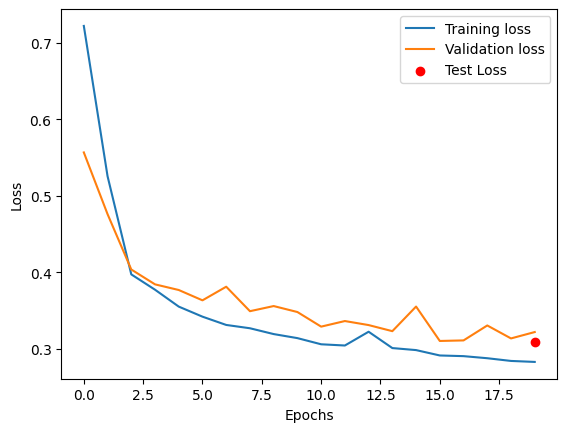

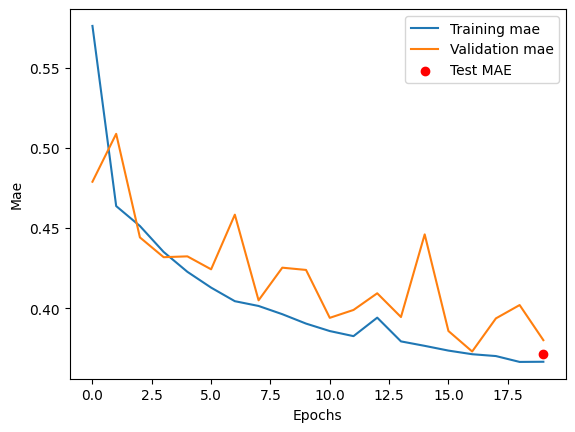

In [56]:
plot_metrics(history, y_test, y_pred, test_loss, test_mae, 'loss')
plot_metrics(history, y_test, y_pred, test_loss, test_mae, 'mae')